# INSERTION SORT




In [29]:
#insertion sort

list = [10,25,8,90,22,59,74,94,11,14,20,18]
# list = [90,22,59]
comparisons=0
def insertionsort(list,comparisons):
    for x in range(1,len(list)):
        for y in range(x,0,-1):
            comparisons+=1
            # print(list[y],list[y-1])
            if list[y]<list[y-1]:
                # print("swap:",list[y],list[y-1])
                temp=list[y-1]
                list[y-1]=list[y]
                list[y]=temp
    
    return list,comparisons

#where index of val greater than target index
# def insert(list,indexofval,targetindex):
#     if indexofval>targetindex:
#         list_a=list[:targetindex]
#         list_b=list[targetindex:indexofval]
#         list_c=list[indexofval+1:]
#         final_list=list_a+[list[indexofval]]+list_b+list_c
#         return final_list

def insertionsortNoComparisons(list):
    for x in range(1,len(list)):
        for y in range(x,0,-1):
            # print(list[y],list[y-1])
            if list[y]<list[y-1]:
                # print("swap:",list[y],list[y-1])
                temp=list[y-1]
                list[y-1]=list[y]
                list[y]=temp
            else:
                break
    
    return list

print(insertionsort(list,0))
 

([8, 10, 11, 14, 18, 20, 22, 25, 59, 74, 90, 94], 66)


# MERGE SORT

In [3]:
def mergesort(list,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,comparisons
  
    first_list=list[:mid]
    second_list=list[mid:]

    a,comparisons_a=mergesort(first_list,0)
    b,comparisons_b=mergesort(second_list,0)
    comparisons=comparisons_a+comparisons_b+comparisons
    list,comparisons=merge(a,b,comparisons)

    return list,comparisons

def merge(list_1,list_2,comparisons):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list,comparisons

print(mergesort([2,4,3,1,5,9,6,20,50,10],0))

def mergesortNoComparisons(list):
    mid=len(list)//2
    if mid==0:
        return list
  
    first_list=list[:mid]
    second_list=list[mid:]

    a=mergesortNoComparisons(first_list)
    b=mergesortNoComparisons(second_list)
    list=mergeNoComparisons(a,b)

    return list

def mergeNoComparisons(list_1,list_2):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list


([1, 2, 3, 4, 5, 6, 9, 10, 20, 50], 19)


# HYBRID SORT

In [4]:

import numpy as np

def hybridsortNoComparisons(list,S):
    mid=len(list)//2
    if mid==0:
        return list,S
    first_list=list[:mid]
    second_list=list[mid:]
    if len(list)>S:
        a,S=hybridsortNoComparisons(first_list,S)
        b,S=hybridsortNoComparisons(second_list,S)
        list=mergeNoComparisons(a,b)   
    else:
        a=insertionsortNoComparisons(list)
       
  
    return list,S



#FULL INSERTION SORT ON LEN < S
def hybridsort(list,S,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,S,comparisons
    
    if len(list)>S:
        first_list=list[:mid]
        second_list=list[mid:]
        a,S,comparisons_a=hybridsort(first_list,S,0)
        b,S,comparisons_b=hybridsort(second_list,S,0)
        comparisons=comparisons_a+comparisons_b+comparisons
        list,comparisons=merge(a,b,comparisons) 
    else:
        a,comparisons=insertionsort(list,0)
        
    # print("comparisons:",comparisons)
    return list,S,comparisons




def merge(list_1,list_2,comparisons):
    x=0
    y=0
    # print("merge:",list_1,list_2)
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        # print("merge:",list_1[x],list_2[y])
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1
    # print("final_list:",final_list)
    return final_list,comparisons



# arr=np.random.randint(30, size=100)

print(hybridsort( [10,25,8,90,22,59,74,94,11,14,20,18],4,0))


([8, 10, 11, 14, 18, 20, 22, 25, 59, 74, 90, 94], 4, 31)


# TIME COMPLEXITY
Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, ..., x], where x is the largest number you allow for your
datasets.

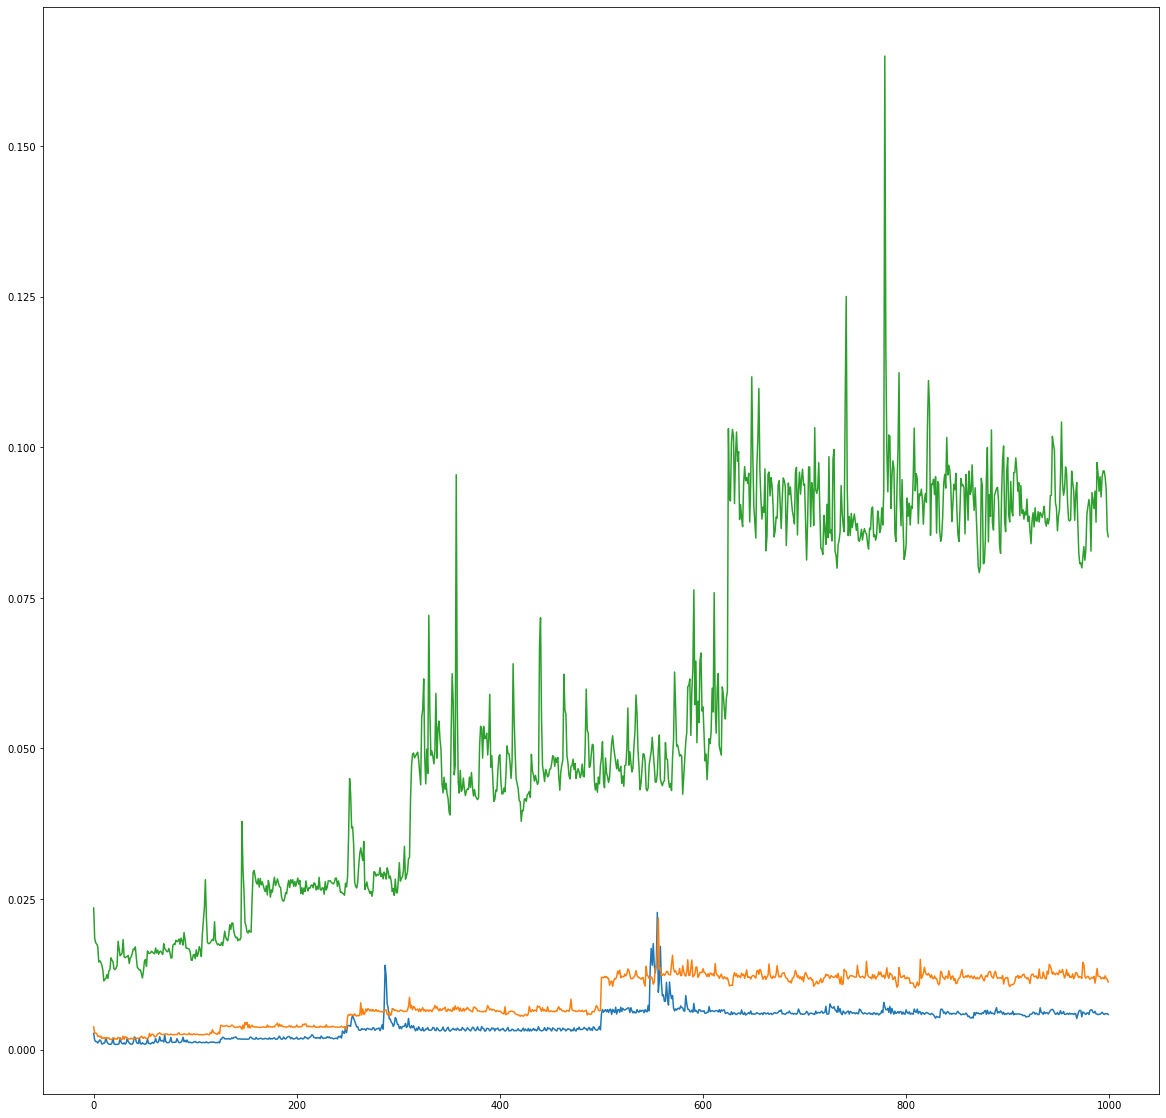

In [13]:
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(22)
arr=np.random.randint(10000000, size=10000000)

s_main=[]
t_main=[]
for size in [500,1000,5000]:
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    # f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
    s_main+=[s_arr]
    t_main+=[time_arr]

f = plt.figure(figsize=(20,20))   
plt.plot(s_main[0],t_main[0],s_main[1],t_main[1],s_main[2],t_main[2])


plt.show()


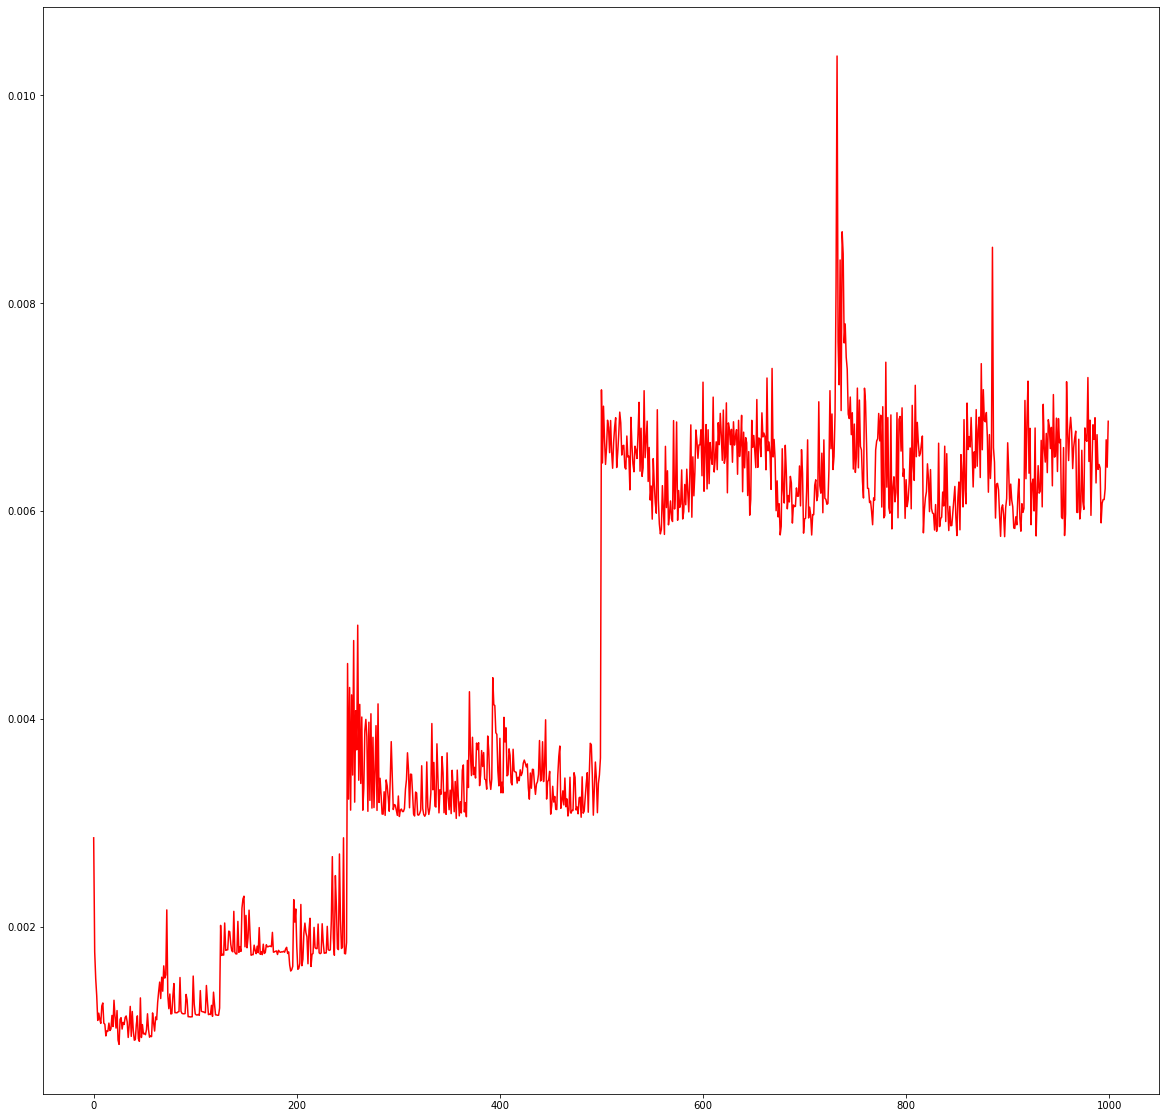

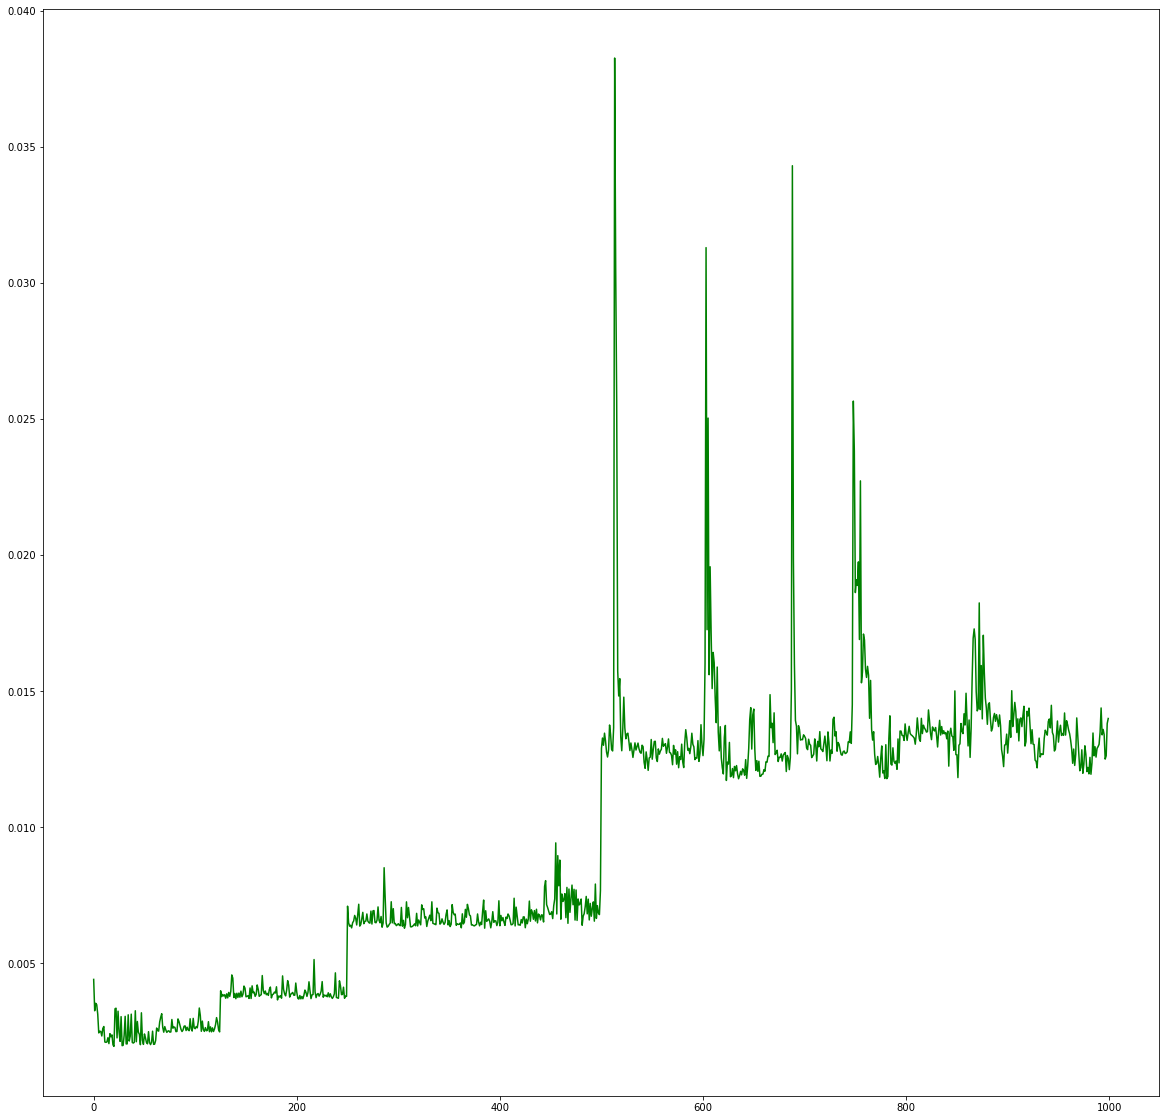

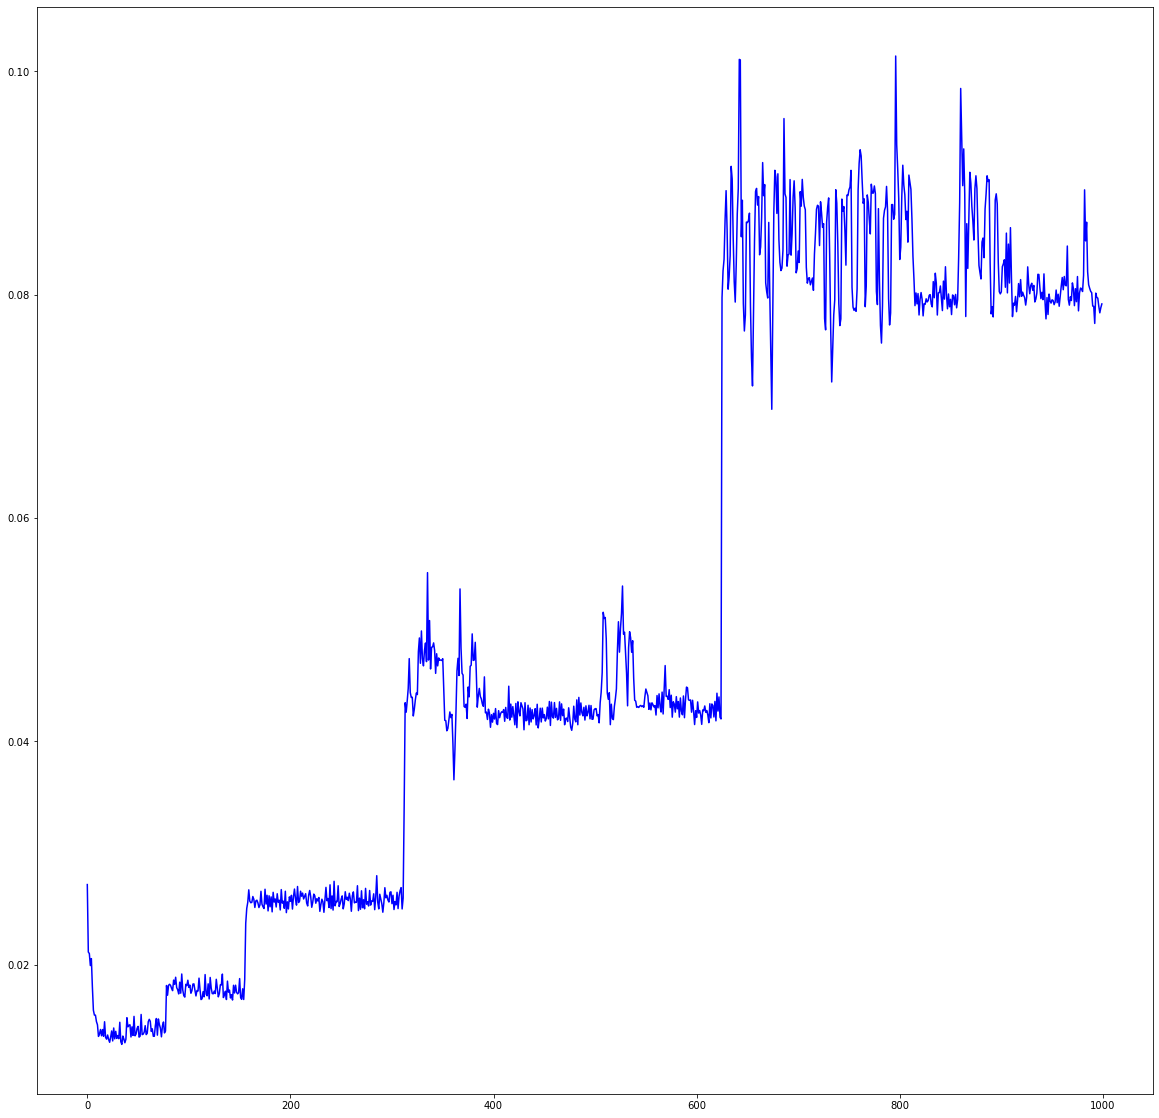

In [10]:


color=['r','g','b']
x=0
for size in [500,1000,5000]:
    
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
 
    plt.plot(s_arr, time_arr,color[x])
    x+=1
    

plt.show()

# plt.plot(t, a, 'r') # plotting t, a separately 
# plt.plot(t, b, 'b') # plotting t, b separately 
# plt.plot(t, c, 'g') # plotting t, c separately 
# plt.show()

# Determining the optimal value of S

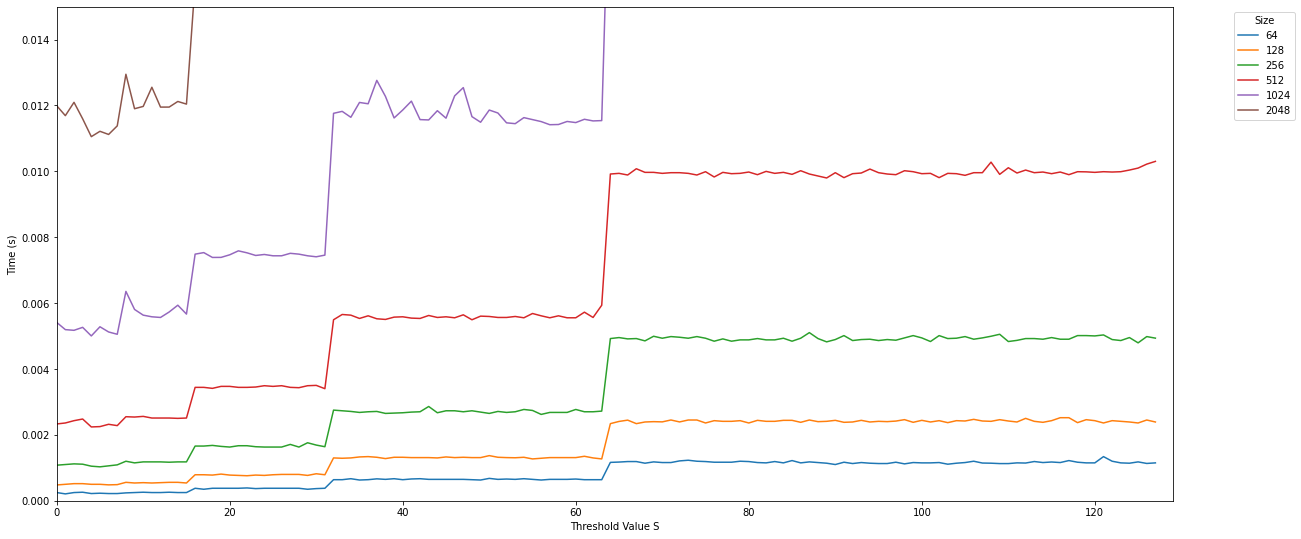

In [34]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
for size in [64, 128, 256, 512, 1024, 2048]: # change this to compute different array sizes
    sTimes = []
    thresholds = range(0,128) # zoom in on S between 0 and 50
    for S in thresholds:
        testtimes = []
        for _ in range(100):
            arr = np.random.rand(size)

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)
            
            testtimes.append(end_time)

        sTimes.append(np.mean(testtimes))

    sizeTimes.append((thresholds, sTimes))

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[64, 128, 256, 512, 1024, 2048])

plt.ylim(0,0.015)
plt.xlim(0,129)
plt.show()

In [35]:
for i in range(6):
    sTime = sizeTimes[i][1]
    sTime
    min = 1
    minIndex = -1
    for i in range(len(sTime)):
        if sTime[i] < min:
            min = sTime[i]
            minIndex = i

    print(min, minIndex)

0.00021019697189331055 1
0.00048056364059448245 0
0.0010309290885925292 5
0.0022420358657836916 4
0.00500452995300293 4
0.011053156852722169 4


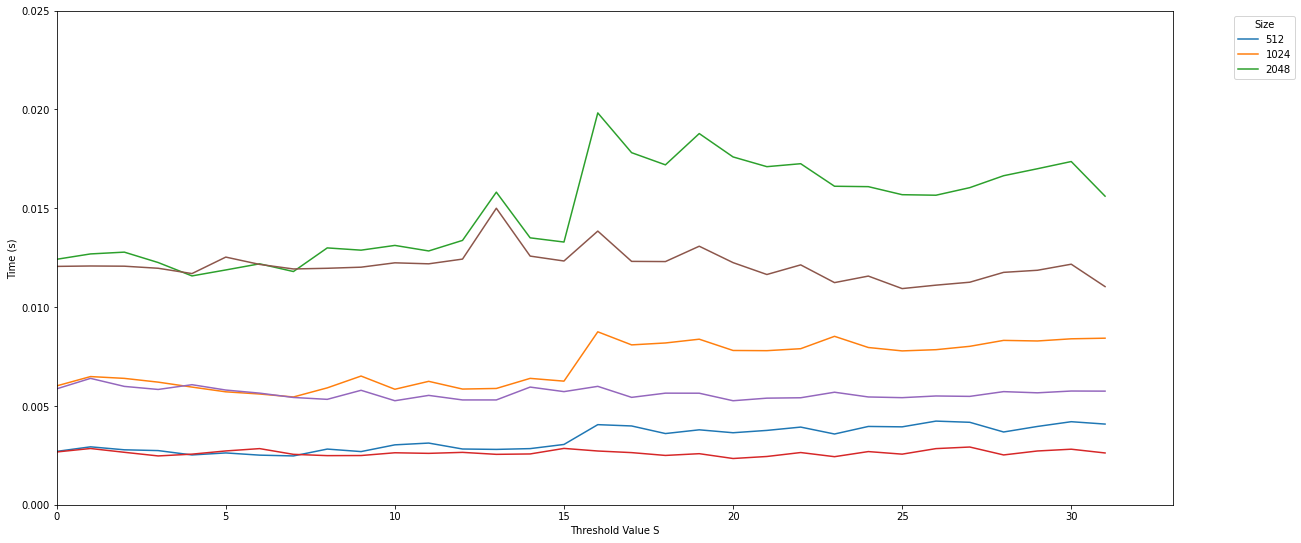

In [38]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [512,1024,2048]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,32) # zoom in on S between 0 and 50
    for S in thresholds:
        testtimes = []
        testtimesMerge = []
        for _ in range(100):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 
for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[512,1024,2048])

plt.ylim(0,0.025)
plt.xlim(0,33)
plt.show()

In [67]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [4,8,16,32,64,128,256,516,1024,2048,4096,8192]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,32) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(100):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break


1.0006427764892578e-05 1.0008811950683593e-05 32
9.996891021728516e-06 3.0033588409423828e-05 32
8.006811141967773e-05 0.00013011932373046875 32
0.00014012575149536133 0.00014014244079589843 28
0.0002202153205871582 0.0002802419662475586 16
0.0004804682731628418 0.0006305503845214843 15
0.001241157054901123 0.0012511110305786133 16
0.002882556915283203 0.0029427027702331543 16
0.005575029850006103 0.005575246810913086 15
0.012471301555633545 0.012481412887573241 14
0.027224791049957276 0.027285640239715577 14
0.05923487424850464 0.05925911426544189 16


4.995524883270264e-05 5.212745666503906e-05 13


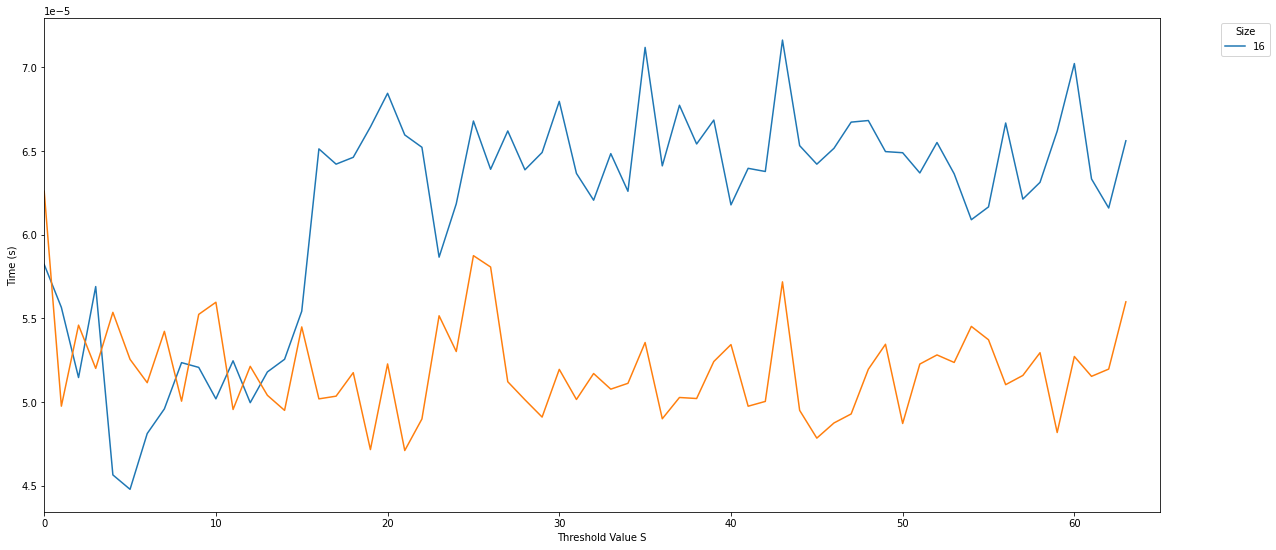

In [68]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [16]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2020)
        testtimes = []
        testtimesMerge = []
        for _ in range(10000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 
for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[16])

plt.xlim(0,65)
plt.show()


0.00010389435291290283 0.00010399415493011475 15


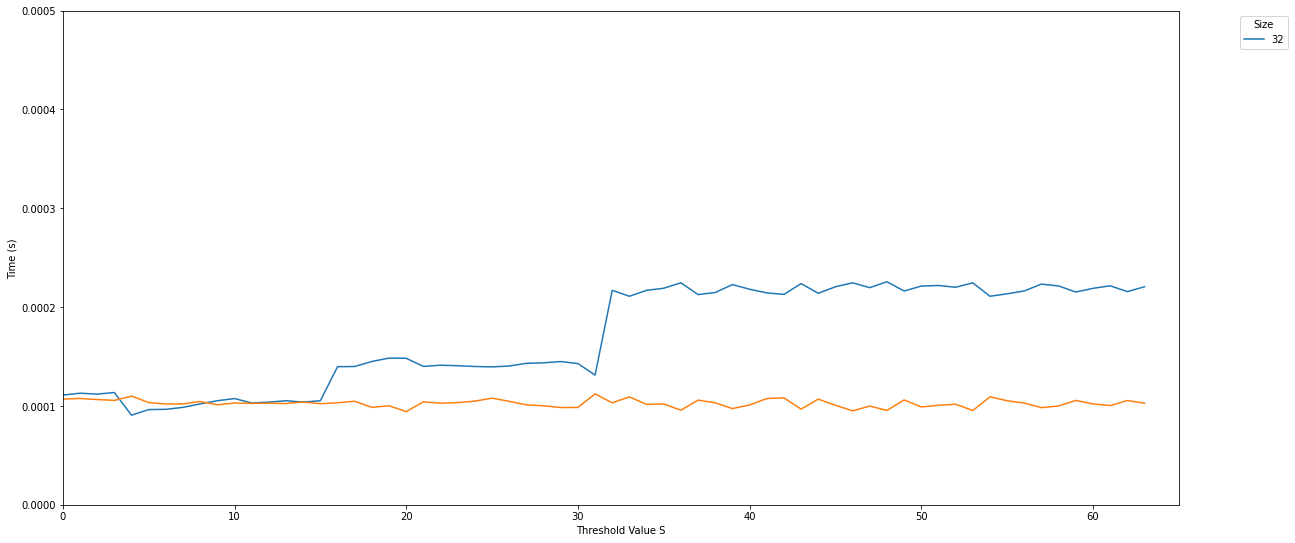

In [56]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [32]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(10000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[32])

plt.ylim(0,0.0005)
plt.xlim(0,65)
plt.show()


0.0002279053211212158 0.00023001010417938233 16


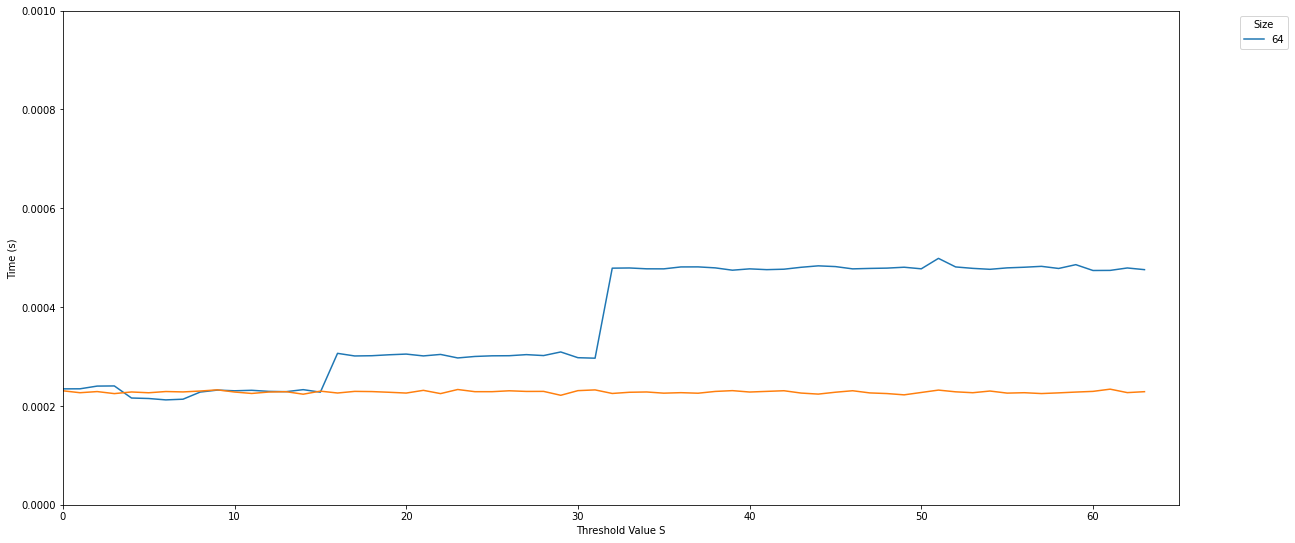

In [57]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [64]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(10000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[64])

plt.ylim(0,0.001)
plt.xlim(0,65)
plt.show()


0.0005075612306594849 0.0005177696466445923 14


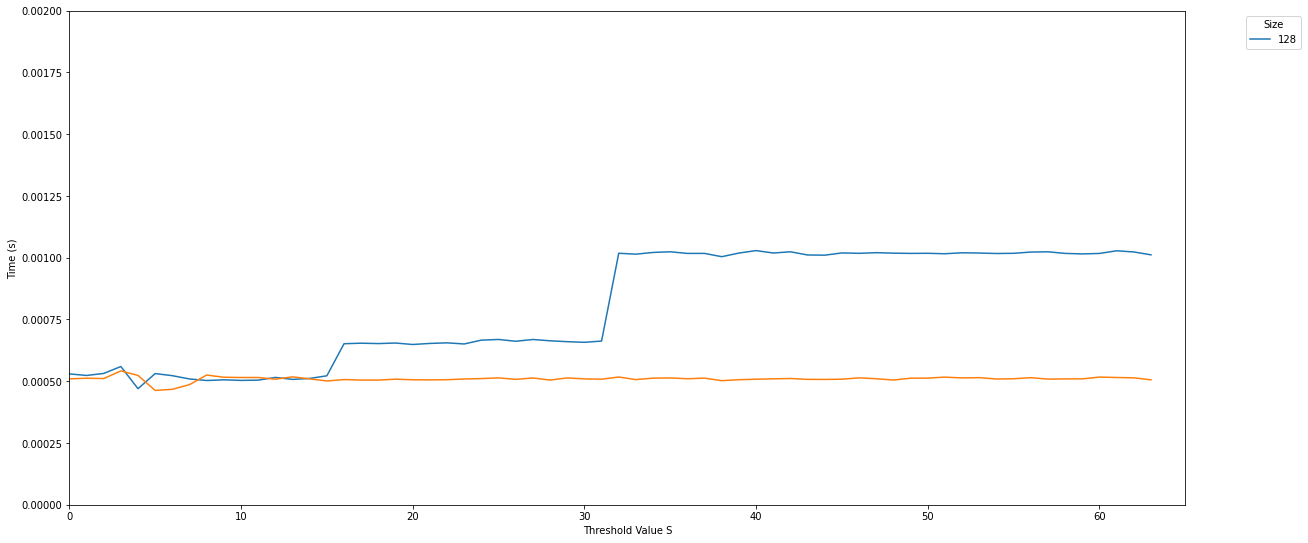

In [58]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [128]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(10000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[128])

plt.ylim(0,0.002)
plt.xlim(0,65)
plt.show()


0.0011089696884155273 0.0011100471019744873 13


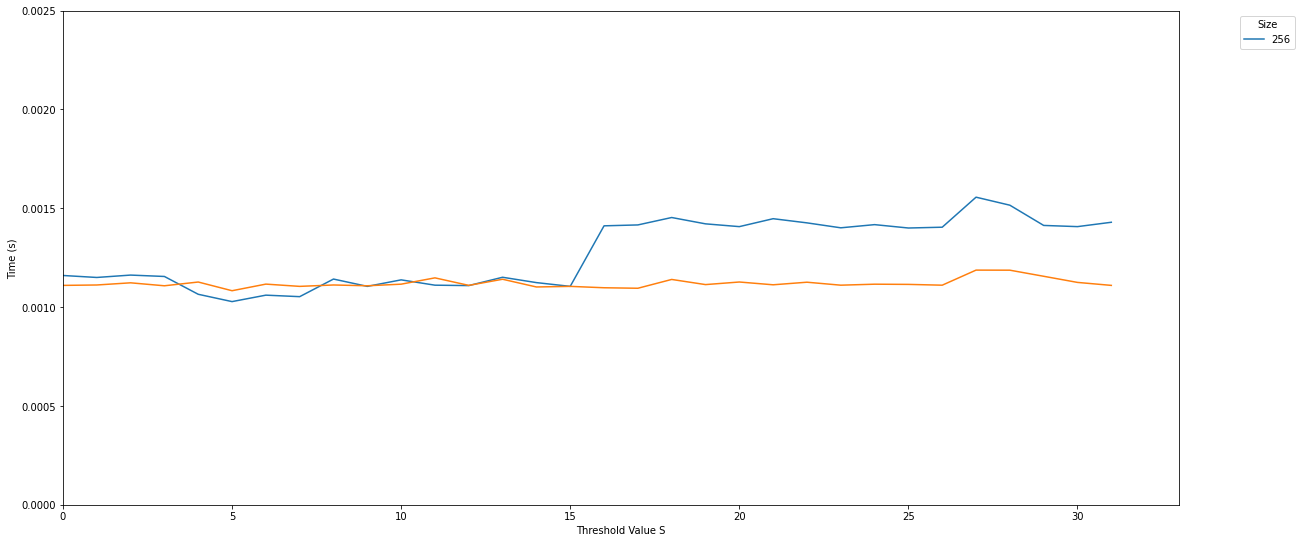

In [59]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [256]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,32) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(1000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[256])

plt.ylim(0,0.0025)
plt.xlim(0,33)
plt.show()


0.0026828134059906006 0.0027190794944763185 15


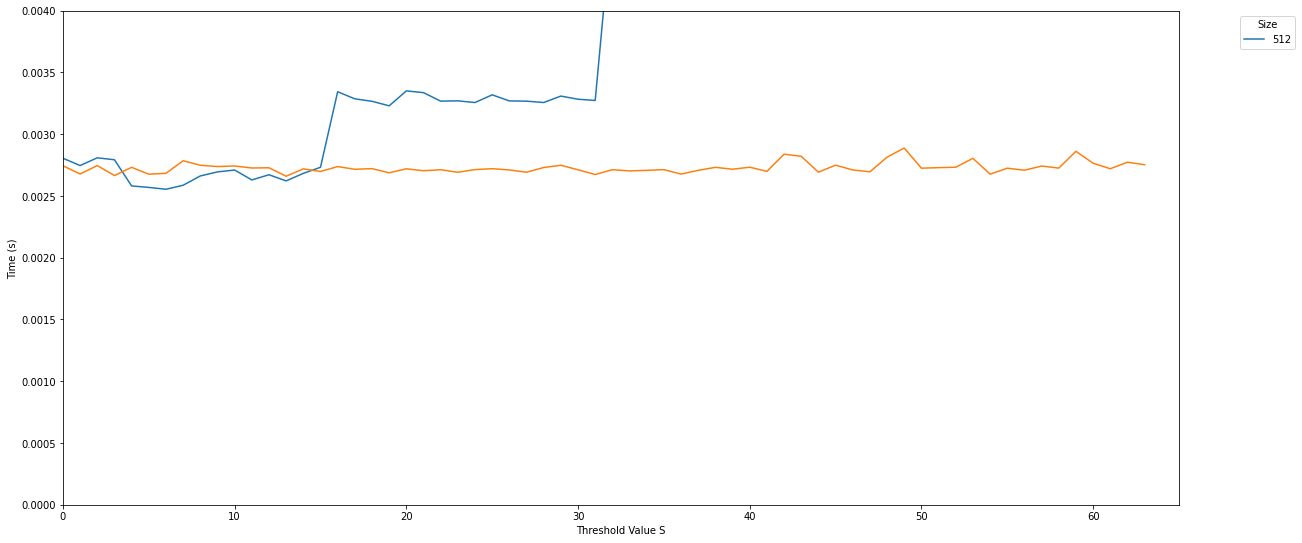

In [69]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [512]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2020)
        testtimes = []
        testtimesMerge = []
        for _ in range(1000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[512])

plt.ylim(0,0.004)
plt.xlim(0,65)
plt.show()


0.005965020179748535 0.005977404832839966 16


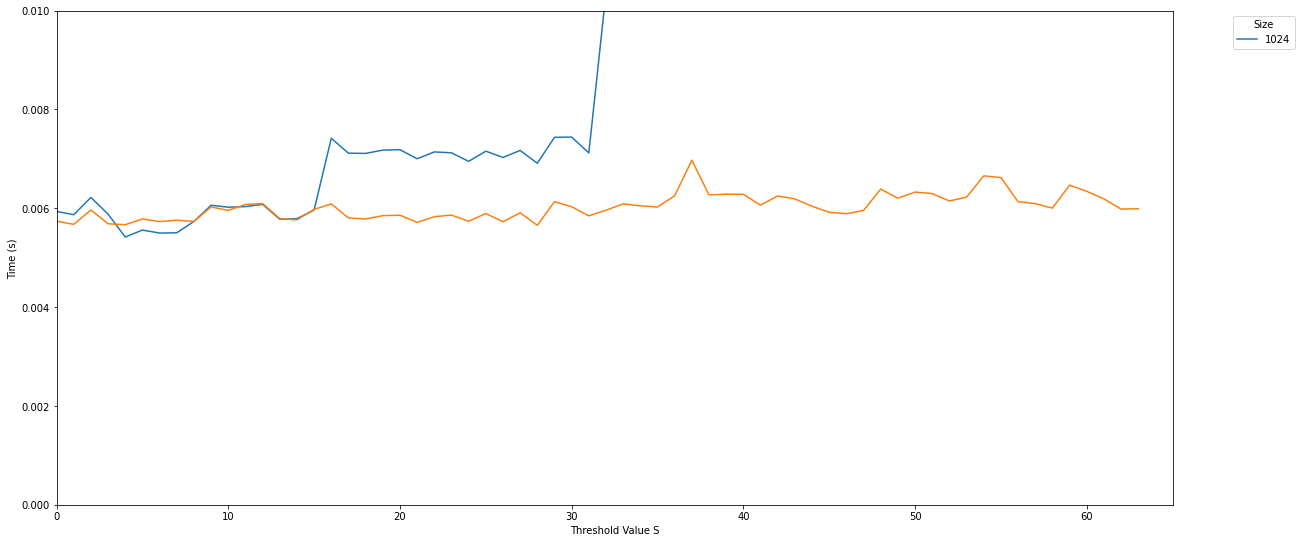

In [61]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [1024]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(1000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[1024])

plt.ylim(0,0.01)
plt.xlim(0,65)
plt.show()


0.0131013445854187 0.013157337427139282 14


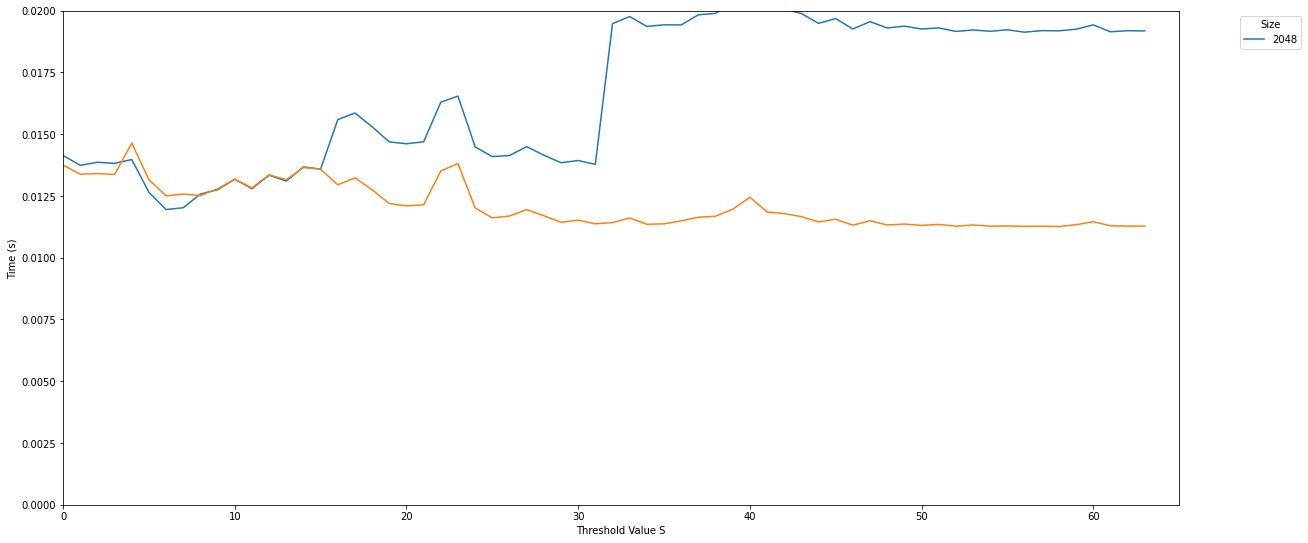

In [62]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [2048]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(1000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[2048])

plt.ylim(0,0.02)
plt.xlim(0,65)
plt.show()


0.02519487142562866 0.02520015335083008 16


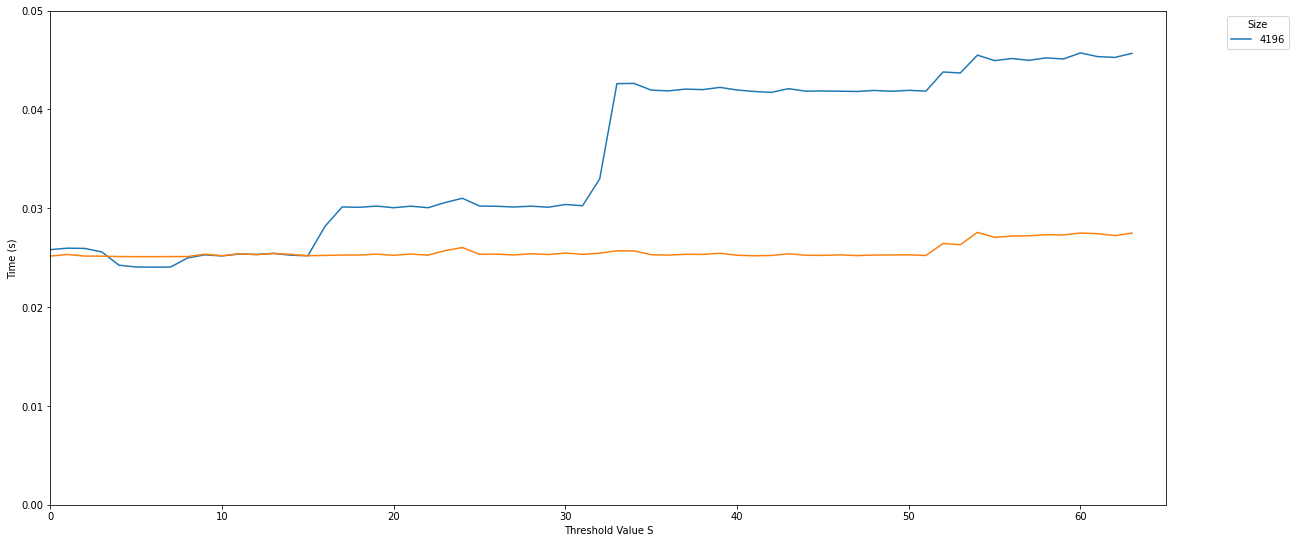

In [63]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [4196]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,64) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        for _ in range(1000):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr, S = hybridsortNoComparisons(arr, S)
            end_time = (time.time() - start_time)

            testtimes.append(end_time)

            start_time = time.time()
            arr = mergesortNoComparisons(arr2)
            end_time = (time.time() - start_time)

            testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[4196])

plt.ylim(0,0.05)
plt.xlim(0,65)
plt.show()


10.28997278213501 10.643359899520874 15


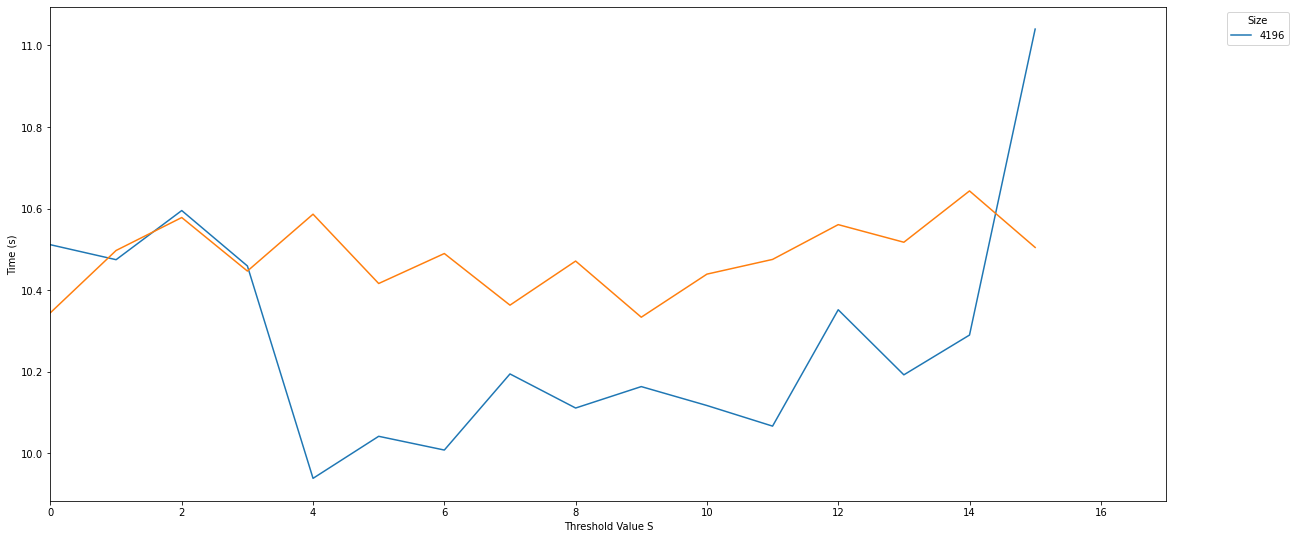

In [64]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [1000000]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,16) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2022)
        testtimes = []
        testtimesMerge = []
        
        arr = np.random.rand(size)
        arr2 = arr.copy()

        start_time = time.time()
        arr, S = hybridsortNoComparisons(arr, S)
        end_time = (time.time() - start_time)

        testtimes.append(end_time)

        start_time = time.time()
        arr = mergesortNoComparisons(arr2)
        end_time = (time.time() - start_time)

        testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[4196])

plt.xlim(0,17)
plt.show()


10.792792320251465 11.475537300109863 15


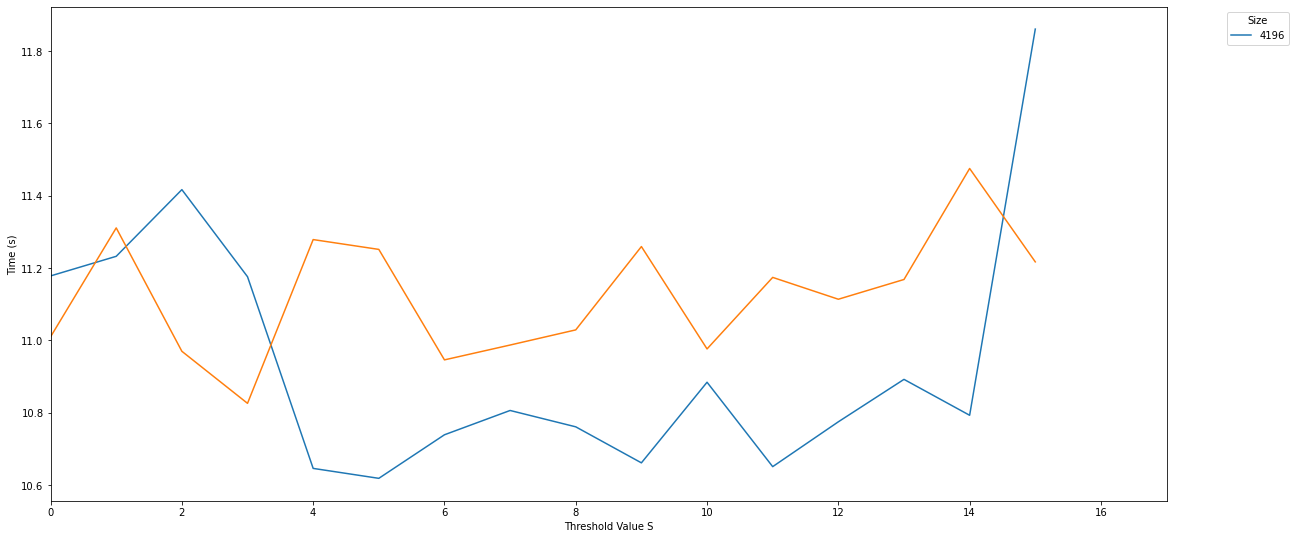

In [70]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sizeTimes = []
sizeTimesMerge = []
for size in [1000000]: # change this to compute different array sizes
    sTimes = []
    sTimesMerge = []
    thresholds = range(0,16) # zoom in on S between 0 and 50
    for S in thresholds:
        np.random.seed(2020)
        testtimes = []
        testtimesMerge = []
        
        arr = np.random.rand(size)
        arr2 = arr.copy()

        start_time = time.time()
        arr, S = hybridsortNoComparisons(arr, S)
        end_time = (time.time() - start_time)

        testtimes.append(end_time)

        start_time = time.time()
        arr = mergesortNoComparisons(arr2)
        end_time = (time.time() - start_time)

        testtimesMerge.append(end_time)         
        sTimes.append(np.mean(testtimes))
        sTimesMerge.append(np.mean(testtimesMerge))
    sizeTimesMerge.append((thresholds, sTimesMerge))
    sizeTimes.append((thresholds, sTimes))

for i in range(len(sizeTimes)):
    for j in range(len(sizeTimes[i][1])-1,-1,-1):
        if sizeTimes[i][1][j] < sizeTimesMerge[i][1][j]:
            print(sizeTimes[i][1][j], sizeTimesMerge[i][1][j], j+1)
            break

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 

for t in sizeTimesMerge:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size", labels=[4196])

plt.xlim(0,17)
plt.show()


# Hybridsort vs Mergesort

Average Case

In [71]:
import time
np.random.seed(2022)
arr = np.random.rand(16777216)
start_time = time.time()
sortedArr, S, comparisons = hybridsort(arr, 15, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)

np.random.seed(2022)
arr = np.random.rand(16777216)
start_time = time.time()
sortedArr,comparisons = mergesort(arr, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)


CPU Time: 259.53493428230286
Comparisons: 407163529
CPU Time: 261.09132742881775
Comparisons: 381438081


In [72]:
import numpy as np
import time
np.random.seed(2022)
arr = np.random.rand(10000000)
start_time = time.time()
sortedArr, S, comparisons = hybridsort(arr, 15, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)

np.random.seed(2022)
arr = np.random.rand(10000000)
start_time = time.time()
sortedArr,comparisons = mergesort(arr, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)

CPU Time: 156.14410305023193
Comparisons: 240844937
CPU Time: 151.99468278884888
Comparisons: 220098361
